In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

### loading the data and merging the three dataframes

In [5]:
DataV1 = pd.read_csv('../Data/avito_cars_data(1).csv')
DataV2 = pd.read_csv('../Data/avito_cars_data(2).csv')
DataV3 = pd.read_csv('../Data/avito_cars_data(3).csv')
DataV4 = pd.read_csv('../Data/avito_cars_data(4).csv')


In [14]:
DataSet = pd.concat([DataV1 , DataV2 , DataV3 , DataV4] , ignore_index=True)

#### Display the missing values in the DataSet

<Axes: >

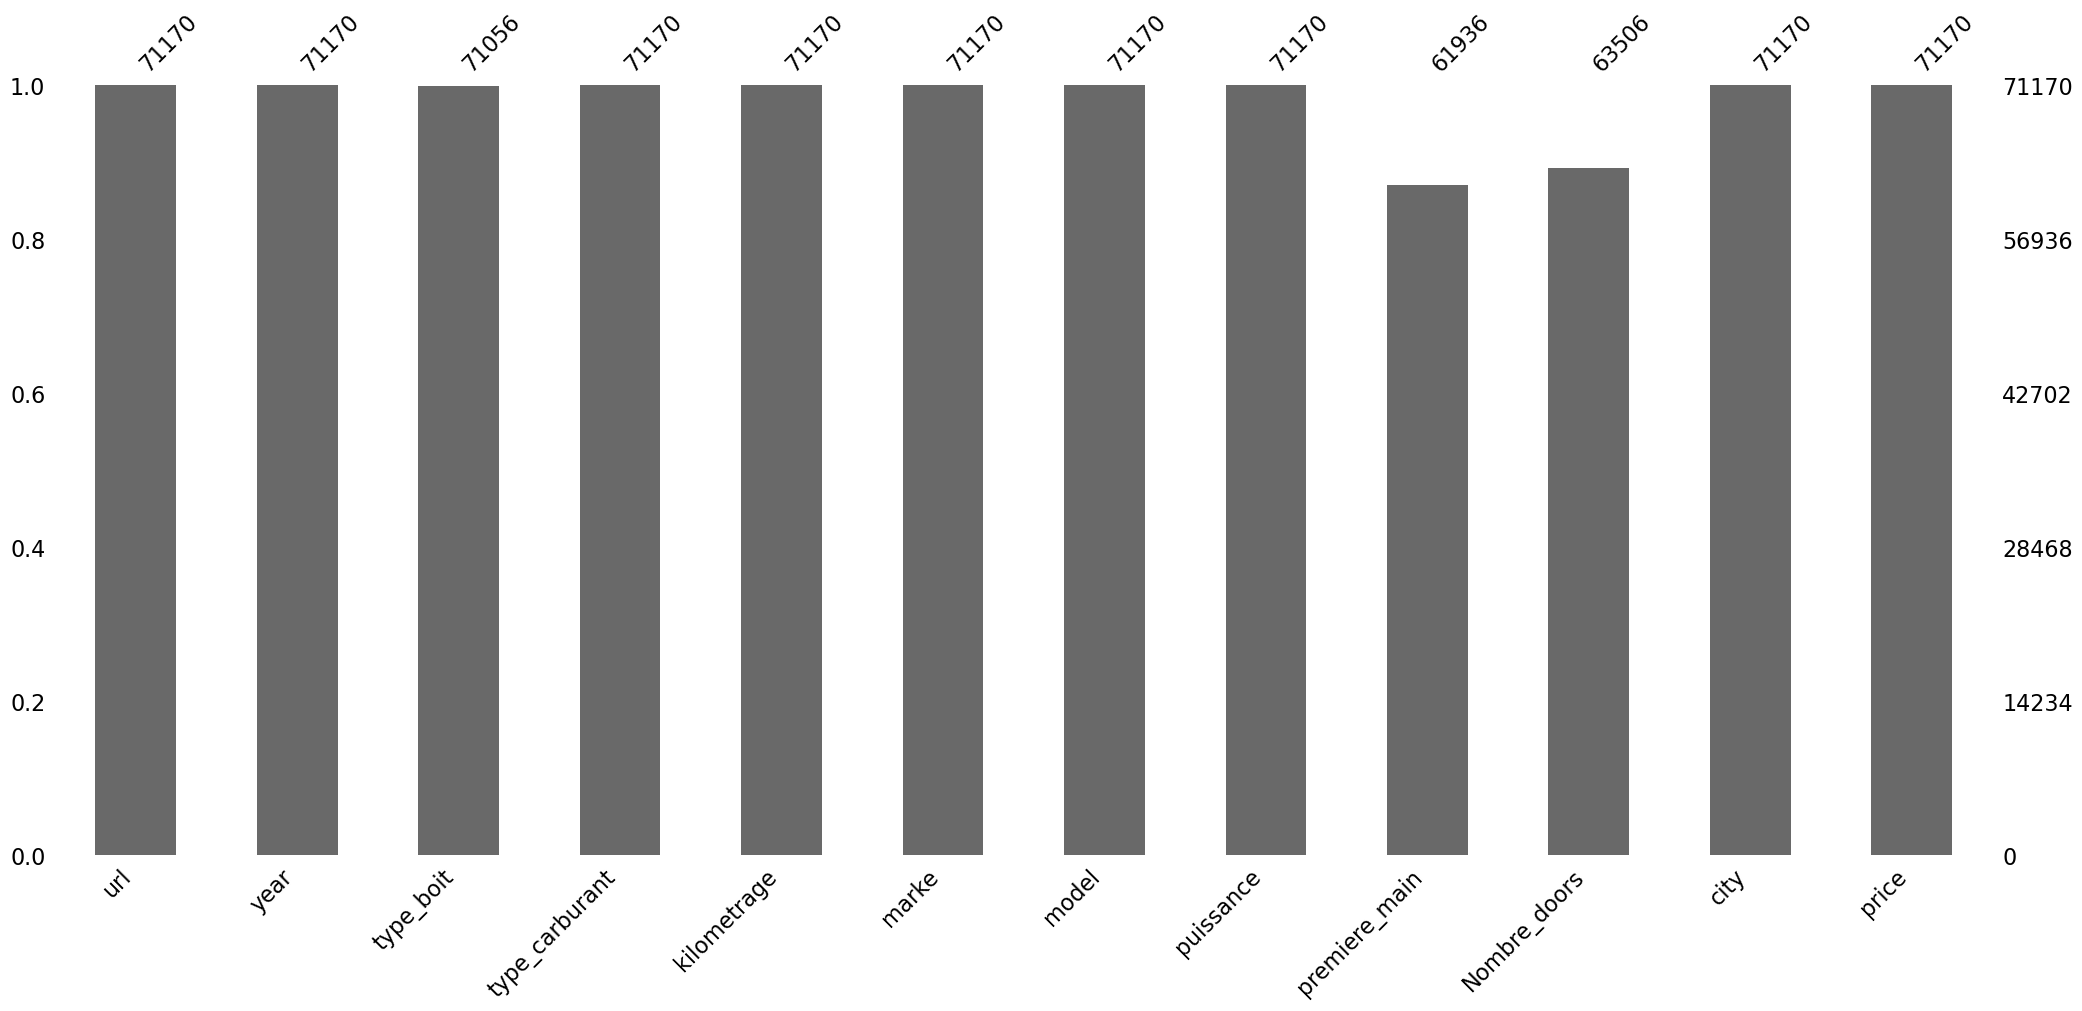

In [19]:
import missingno as msno
msno.bar(DataSet)

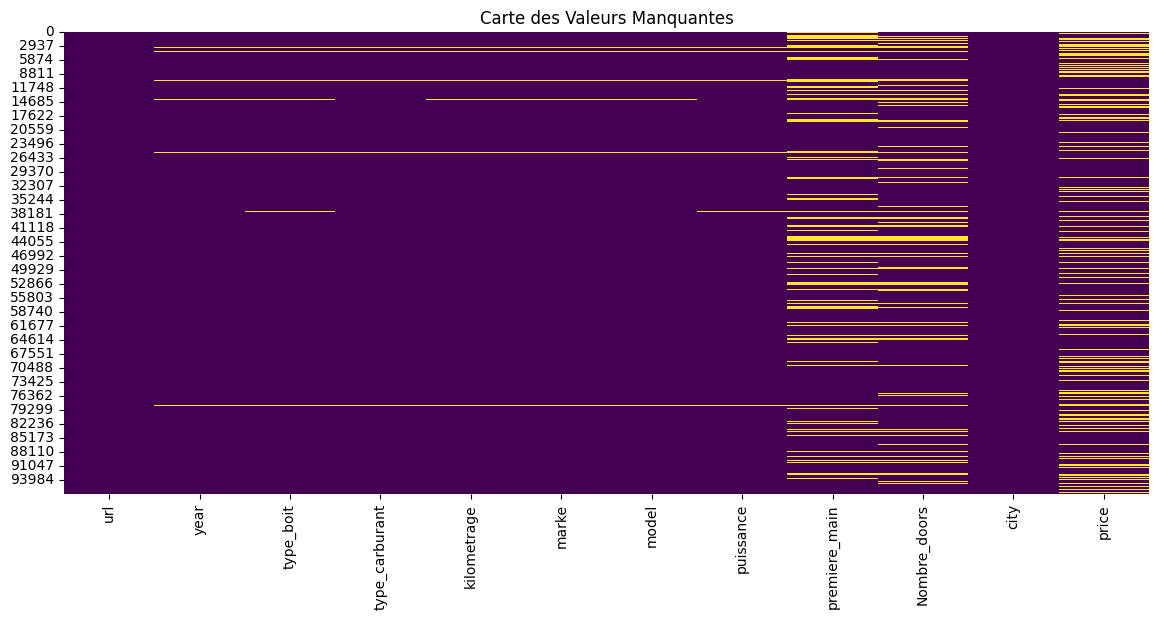

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.heatmap(DataSet.isnull(), cbar=False, cmap="viridis")
plt.title("Carte des Valeurs Manquantes")
plt.show()

### Remove None Values

In [ ]:
DataSet = DataSet.dropna(subset=['price'])
DataSet = DataSet.dropna(subset=['type_boit'])
DataSet = DataSet.dropna(subset=['type_carburant'])
DataSet = DataSet.dropna(subset=['kilometrage'])
DataSet = DataSet.dropna(subset=['marke'])
DataSet = DataSet.dropna(subset=['model'])
DataSet = DataSet.dropna(subset=['puissance'])
DataSet = DataSet.dropna(subset=['price'])

In [18]:
DataSet['model'].isnull().sum()

np.int64(0)

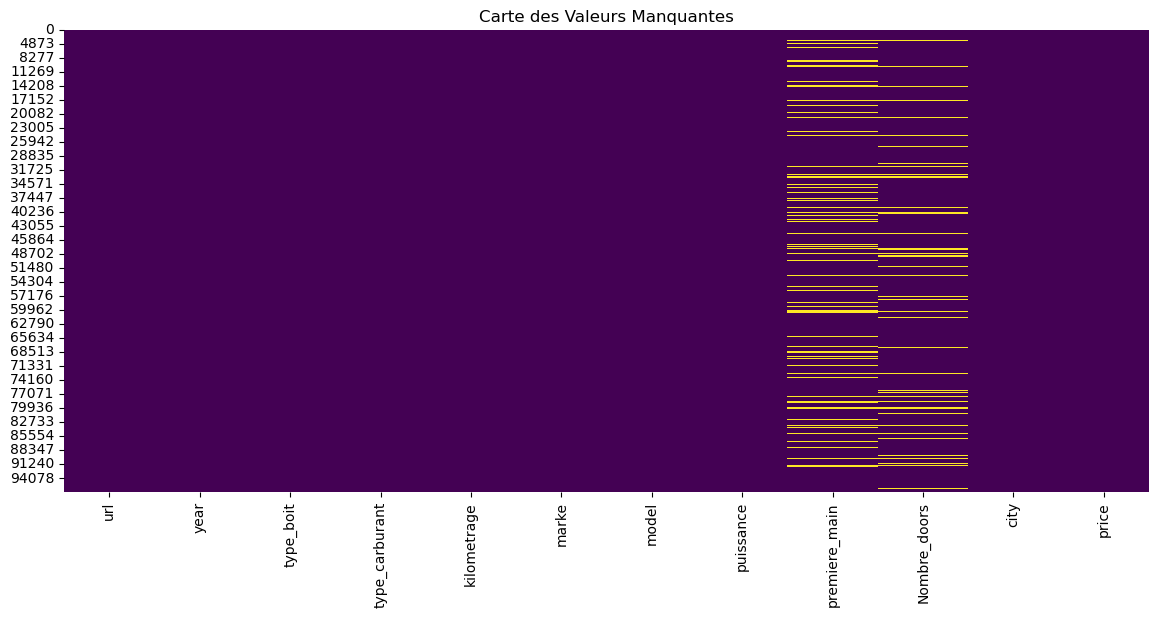

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.heatmap(DataSet.isnull(), cbar=False, cmap="viridis")
plt.title("Carte des Valeurs Manquantes")
plt.show()

### Remove Duplicate Values

In [8]:
DataSet = DataSet.drop_duplicates(subset='url', keep='first')

In [9]:
DataSet = DataSet.reset_index()

### Cleaning Price 

In [10]:
DataSet['price'] = DataSet['price'].str.replace('DH', '', regex=False).str.replace('\u202f' , '').str.replace(' ' , '').astype(int)


### Cleaning Kilometrage

In [11]:
def clean_kilometrage_column(row):
        parts = row.split('-')
        kilometrage = []
        for k in parts:
            if 'Plus de' in k:
                  k = k.replace('Plus de', '')  
            ki = k.replace(' ', '')
            ki = int(ki)
            kilometrage.append(ki)
        if(len(kilometrage)== 1) : 
              kilometrage = kilometrage[0]
              return kilometrage

        if(len(kilometrage)==2) : 
            kilometrage = (kilometrage[0]+kilometrage[1])//2
            return kilometrage

        
DataSet['kilometrage'] = DataSet['kilometrage'].apply(clean_kilometrage_column)



In [12]:
print(DataSet['kilometrage'].unique())

[ 62499 154999  97499  22499  72499 164999  92499 114999  42499 274999
  47499  12499  67499  27499 174999  57499 134999 194999 144999  82499
  77499  32499 104999 184999 124999 224999 324999   2499  17499  37499
  52499  87499   7499 374999 474999 424999 500000]


### Cleaning Puissance

In [13]:
def clean_puissance_column(row):
    if 'Plus de' in row:
            row = row.replace('Plus de', '')  
    row = row.replace('CV', '')
    row = row.replace(' ', '')
    row = int(row)
    return row
DataSet['puissance'] = DataSet['puissance'].apply(clean_puissance_column)

### Lowercase the values in this columns *[type_carburant , type_boit , marke , marke]*

In [14]:
DataSet['type_carburant'] = DataSet['type_carburant'].str.lower()


In [15]:
DataSet['type_boit'] = DataSet['type_boit'].str.lower()


In [16]:
DataSet['marke'] = DataSet['marke'].str.lower()


In [17]:
DataSet['model'] = DataSet['model'].str.lower()


### Cleaning Year

In [18]:
DataSet['year'] = DataSet['year'].str.replace(' ou plus ancien' , '').astype(int)
print(DataSet['year'].unique())

[2021 2018 2022 2019 2013 2023 2003 2016 2005 2015 2011 2020 2014 2024
 2017 2008 2009 2004 2010 2025 2006 2012 1980 1988 2002 1996 2000 1987
 1999 1990 1992 1998 1994 1985 1991 2007 1993 2001 1989 1986 1984 1995
 1997 1983 1981 1982]


### Cleaning City

In [19]:
def clean_city_column(row):
        parts = row.split(',')
        if(len(parts) == 1) : 
            return parts[0].replace(' ', '').lower()
        else : 
              return parts[1].replace(' ', '').lower()
DataSet['city'] = DataSet['city'].apply(clean_city_column)

In [20]:
DataSet['city'] = DataSet['city'].str.replace('الدارالبيضاء' , 'casablanca')
DataSet['city'] = DataSet['city'].str.replace('سلا' , 'sala')
DataSet['city'] = DataSet['city'].str.replace('فاس' , 'fès')
DataSet['city'] = DataSet['city'].str.replace('مراكش' , 'marrakech')
DataSet['city'] = DataSet['city'].str.replace('الرباط' , 'rabat')
DataSet['city'] = DataSet['city'].str.replace('تطوان' , 'tétouan')
DataSet['city'] = DataSet['city'].str.replace('تمارة' , 'temara')
DataSet['city'] = DataSet['city'].str.replace('طنجة' , 'tanger')
DataSet['city'] = DataSet['city'].str.replace('أكادير' , 'agadir')


### Handle Missing Values in column Number_doors

In [21]:
most_common = DataSet['Nombre_doors'].mode()[0]
DataSet['Nombre_doors'].fillna(most_common, inplace=True)

C:\Users\eddaoudi\AppData\Local\Temp\ipykernel_6116\2612767042.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DataSet['Nombre_doors'].fillna(most_common, inplace=True)


### Ordinal Encoding of 'premiere_main' with Explicit Missing Value Handling

In [22]:
def encode_premiere_main(val):
    if val == 'Non':
        return 0
    elif val == 'Oui':
        return 2
    else:  # None or NaN
        return 1

DataSet['premiere_main'] = DataSet['premiere_main'].apply(encode_premiere_main)

### Detection and Remove outliers

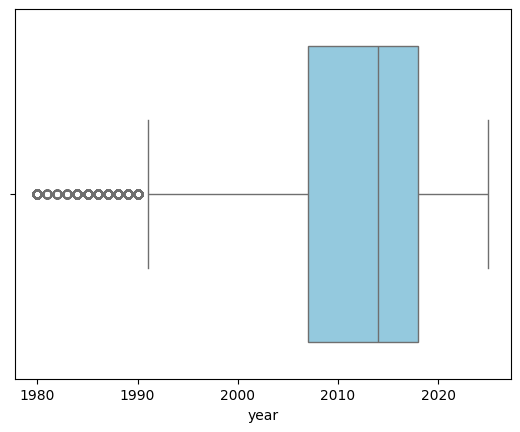

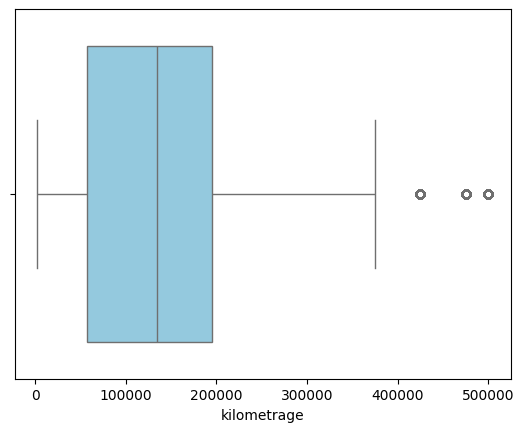

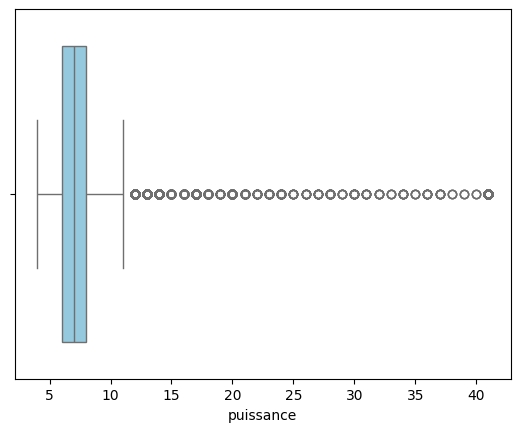

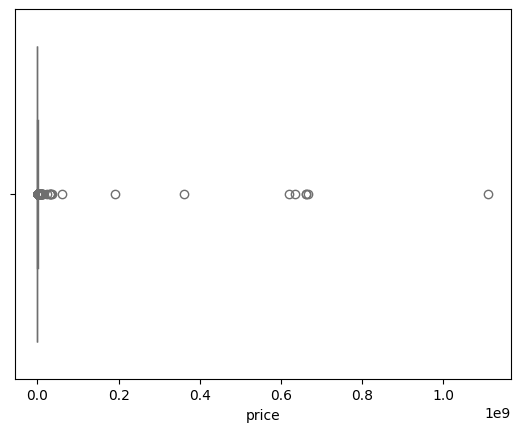

In [23]:
col = DataSet.select_dtypes(exclude=['object']).drop(columns=['index' ,'premiere_main' , 'Nombre_doors']).columns
for i in col:
    sns.boxplot(DataSet[i], orient='h', color='skyblue')
    plt.show()

In [24]:
from scipy import stats
def detect_outliers(df, column):

    z_scores = stats.zscore(df[column])
    threshold = 3
    outliers = df[np.abs(z_scores) > threshold][column]
    return outliers

def remove_outliers(df, column):
    z_scores = stats.zscore(df[column])
    threshold = 3
    new_df = df[np.abs(z_scores) < threshold]
    return new_df

In [25]:
# Detection des outliers 
col = DataSet.select_dtypes(exclude=['object']).drop(columns=['index' ,'premiere_main' , 'Nombre_doors']).columns
for i in col:
    out = detect_outliers(DataSet, i)
    print(out)

117      1980
712      1985
1458     1984
2735     1980
2746     1983
         ... 
64056    1984
64110    1983
64147    1981
64170    1984
64586    1982
Name: year, Length: 584, dtype: int64
408      474999
852      500000
1553     500000
1555     474999
1994     474999
          ...  
64170    474999
64214    500000
64250    500000
64255    500000
64551    474999
Name: kilometrage, Length: 977, dtype: int64
42       17
61       17
95       17
106      17
437      41
         ..
64226    41
64474    20
64551    41
64575    24
64579    17
Name: puissance, Length: 700, dtype: int64
23150      31000000
25240     661280292
25296      32000000
27308     618818655
28133      30000000
28525     666339880
32048      60000000
33144     360000000
36423      36000000
38337     661049493
38821     635262561
43166    1111111111
52461      24000000
54203      33333333
57467     190000000
Name: price, dtype: int64


In [26]:
DataSet = DataSet[DataSet['price'] >= 25000]
DataSet = DataSet[DataSet['price'] <= 1000000]
# Suppression des outliers
col = DataSet.select_dtypes(exclude=['object']).drop(columns=['index' ,'premiere_main' , 'Nombre_doors']).columns
for i in col:
    DataSet = remove_outliers(DataSet, i)




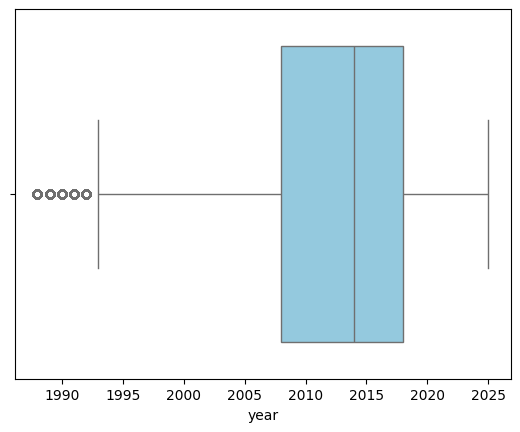

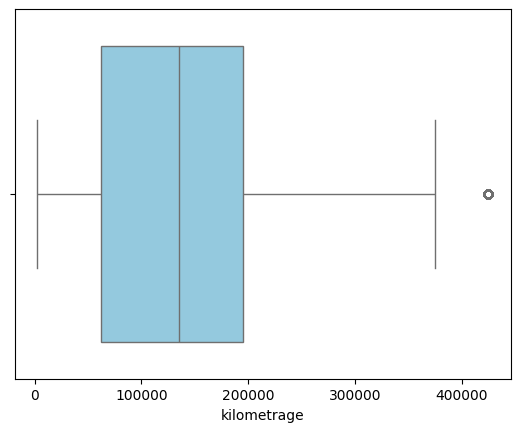

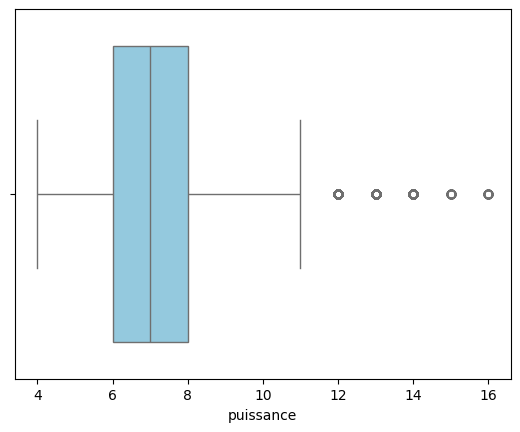

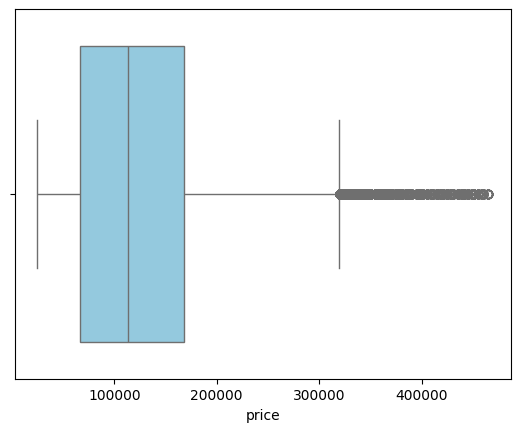

In [27]:
col = DataSet.select_dtypes(exclude=['object']).drop(columns=['index' ,'premiere_main' , 'Nombre_doors']).columns
for i in col:
    sns.boxplot(DataSet[i], orient='h', color='skyblue')
    plt.show()

## Save Data

In [29]:
DataSet.to_csv('../Data/CleanData.csv', index=False)

In [30]:
print(DataSet.shape)

(59150, 13)
